<a href="https://colab.research.google.com/github/mominulhaque666/CSE445.3-Assignment/blob/main/SalesForecast/SalesForecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)

In [3]:
# Upload the model & date wise sales dataset

sales = 'https://raw.githubusercontent.com/mominulhaque666/CSE445.3-Assignment/main/SalesForecast/Date%20and%20model%20wise%20sale.csv'

In [4]:
# Read the audit risk dataset

sales_df = pd.read_csv(sales)
sales_df

,Date,Model,Count
0,31-Aug-16,M45,5
1,31-Aug-16,M121,3
2,31-Aug-16,M122,4
3,31-Aug-16,M91,10
4,31-Aug-16,M66,57
...,...,...,...
46111,01-Jan-14,M74,1
46112,01-Jan-14,M59,1
46113,01-Jan-14,M60,5
46114,01-Jan-14,M54,1


In [5]:
sales_df.head(10)

,Date,Model,Count
0,31-Aug-16,M45,5
1,31-Aug-16,M121,3
2,31-Aug-16,M122,4
3,31-Aug-16,M91,10
4,31-Aug-16,M66,57
5,31-Aug-16,M100,59
6,31-Aug-16,M5,17
7,31-Aug-16,M14,653
8,31-Aug-16,M62,8
9,31-Aug-16,M15,25


In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46116 entries, 0 to 46115
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    46116 non-null  object
 1   Model   46116 non-null  object
 2   Count   46116 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [7]:
sales_df.describe()

,Count
count,46116.000000
mean,96.690108
std,315.065946
min,1.000000
25%,3.000000
50%,14.000000
75%,67.000000
max,6678.000000


In [9]:
# Convert string Date column to datetime

sales_df['Date'] = pd.to_datetime(sales_df['Date'])

In [10]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46116 entries, 0 to 46115
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    46116 non-null  datetime64[ns]
 1   Model   46116 non-null  object        
 2   Count   46116 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.1+ MB


In [11]:
sales_df.head()

,Date,Model,Count
0,2016-08-31,M45,5
1,2016-08-31,M121,3
2,2016-08-31,M122,4
3,2016-08-31,M91,10
4,2016-08-31,M66,57


In [12]:
sales_df['Model'].value_counts()

M119    926
M70     778
M97     770
M88     769
M43     748
       ... 
M14      13
M84      10
M42       2
M47       1
M12       1
Name: Model, Length: 124, dtype: int64

In [15]:
sales_df.isnull().sum()

Date     0
Model    0
Count    0
dtype: int64

In [16]:
sales_df.nunique()

Date      971
Model     124
Count    1191
dtype: int64

In [17]:
sales_df['Model'].unique()

array(['M45', 'M121', 'M122', 'M91', 'M66', 'M100', 'M5', 'M14', 'M62',
       'M15', 'M61', 'M82', 'M108', 'M55', 'M43', 'M31', 'M90', 'M96',
       'M69', 'M76', 'M56', 'M92', 'M72', 'M94', 'M8', 'M97', 'M71',
       'M57', 'M107', 'M99', 'M18', 'M30', 'M36', 'M86', 'M13', 'M73',
       'M81', 'M41', 'M79', 'M70', 'M110', 'M95', 'M51', 'M117', 'M22',
       'M10', 'M65', 'M115', 'M75', 'M124', 'M2', 'M42', 'M112', 'M27',
       'M53', 'M60', 'M120', 'M23', 'M4', 'M39', 'M48', 'M32', 'M87',
       'M6', 'M64', 'M68', 'M17', 'M7', 'M24', 'M44', 'M16', 'M77', 'M78',
       'M28', 'M12', 'M1', 'M84', 'M11', 'M25', 'M20', 'M105', 'M88',
       'M109', 'M21', 'M19', 'M40', 'M9', 'M116', 'M50', 'M67', 'M93',
       'M89', 'M63', 'M123', 'M119', 'M49', 'M52', 'M102', 'M85', 'M126',
       'M59', 'M38', 'M103', 'M74', 'M98', 'M37', 'M113', 'M125', 'M104',
       'M26', 'M35', 'M80', 'M127', 'M111', 'M118', 'M101', 'M58', 'M47',
       'M114', 'M54', 'M29', 'M34', 'M33', 'M106'], dtype=object)

In [18]:
#model and sale relationship 
model_sale = sales_df.groupby('Model')['Count'].sum()
model_sale.sort_values(axis=0, ascending=False, inplace=True)

In [21]:
model_sale.head(10)

Model
M24    632968
M25    601395
M19    325701
M22    289524
M20    259690
M23    173706
M4     173411
M18     99304
M21     93478
M6      87664
Name: Count, dtype: int64

In [22]:
model_sale.tail(10)

Model
M125    987
M113    761
M115    713
M112    533
M116    515
M126    148
M127    113
M42      17
M12       4
M47       3
Name: Count, dtype: int64

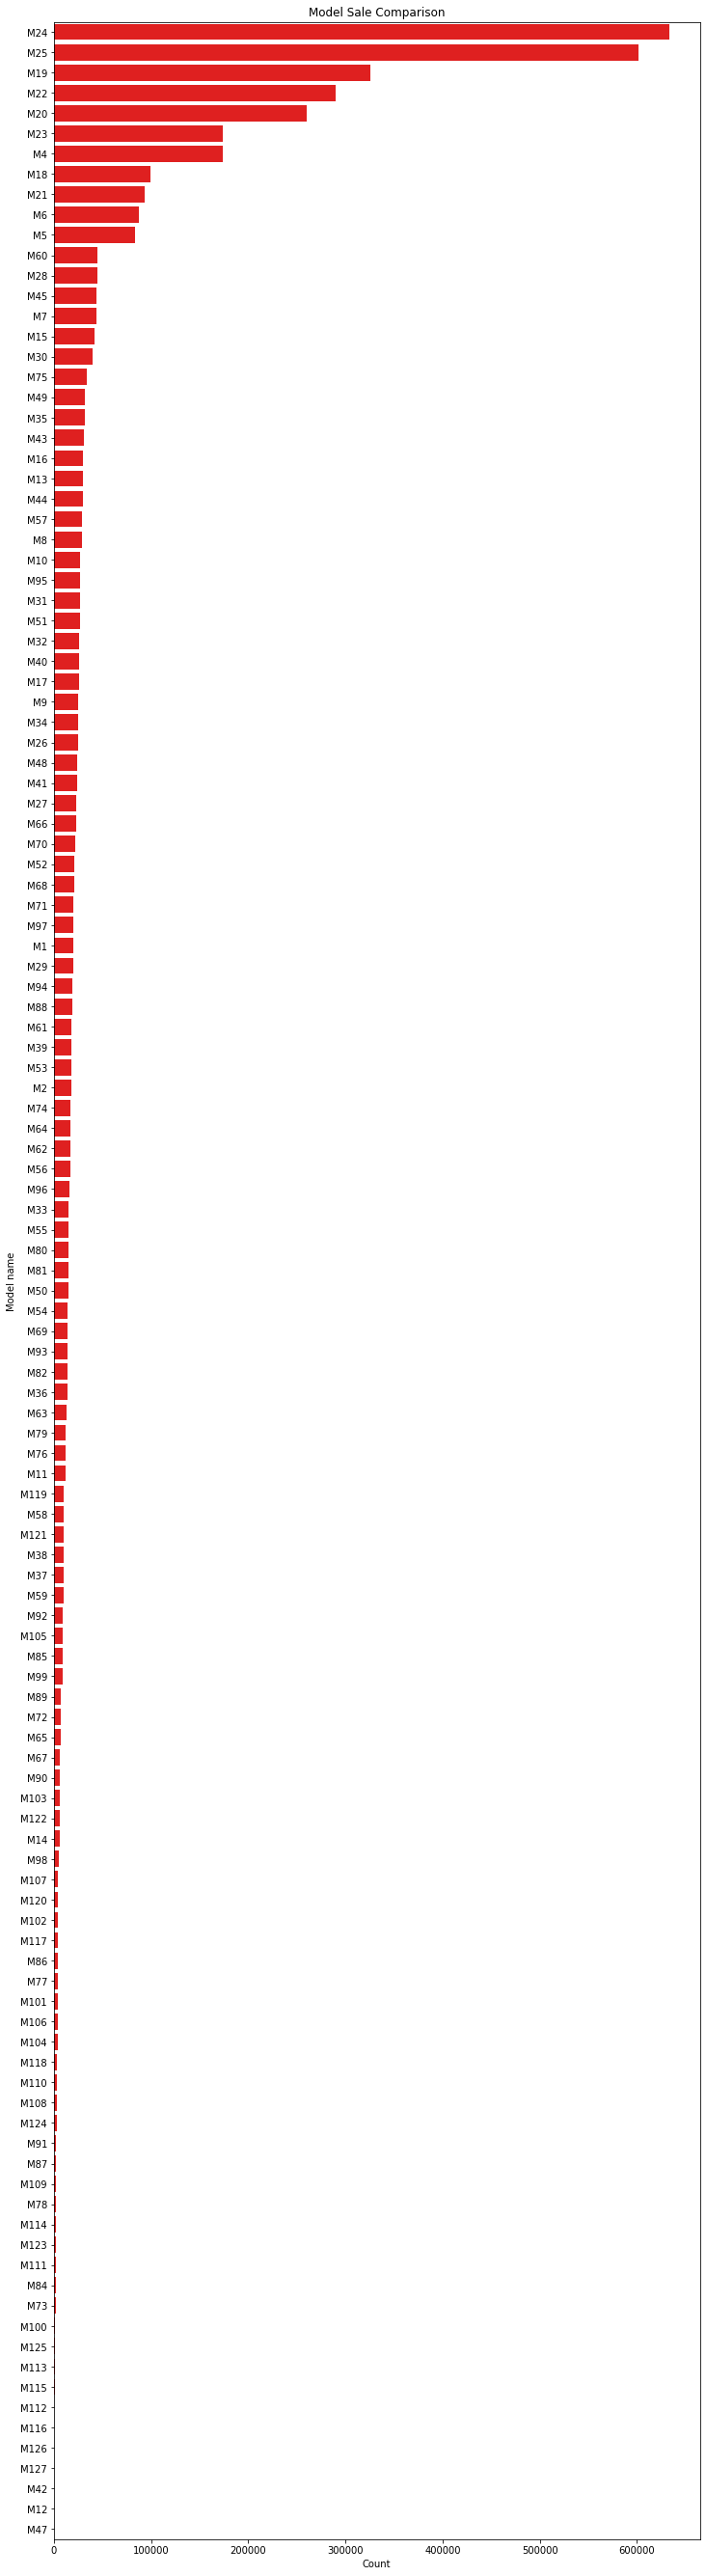

In [20]:
#figure model by count
import seaborn as sns
f, ax = plt.subplots(figsize=(12, 48))
ax = sns.barplot(model_sale, model_sale.index, orient='h', color='red')
ax.set(title='Model Sale Comparison', xlabel='Count', ylabel='Model name')
plt.show()

### From this figure we can see that M24 is the most popular tv model(If sale is high for a specific product than it is the most popoular product). Let's visualize the sale of top 5 models.

In [24]:
# Adding date features
sales_df['day'] = sales_df['Date'].dt.day
sales_df['month'] = sales_df['Date'].dt.month
sales_df['year'] = sales_df['Date'].dt.year

In [33]:
print('Starting date on the dataset')
print(min(sales_df['Date']))
print('Ending date on the dataset')
print(max(sales_df['Date']))

Starting date on the dataset
2014-01-01 00:00:00
Ending date on the dataset
2016-08-31 00:00:00


### We can see, the year 2016 is not fully completed, so our assumption is right. Let's find out monthly basis sale throughout 2014-2016

In [25]:
#Sell by year
yearly_sell = sales_df.groupby('year')['Count'].sum()
yearly_sell

year
2014     370989
2015    2024037
2016    2063935
Name: Count, dtype: int64

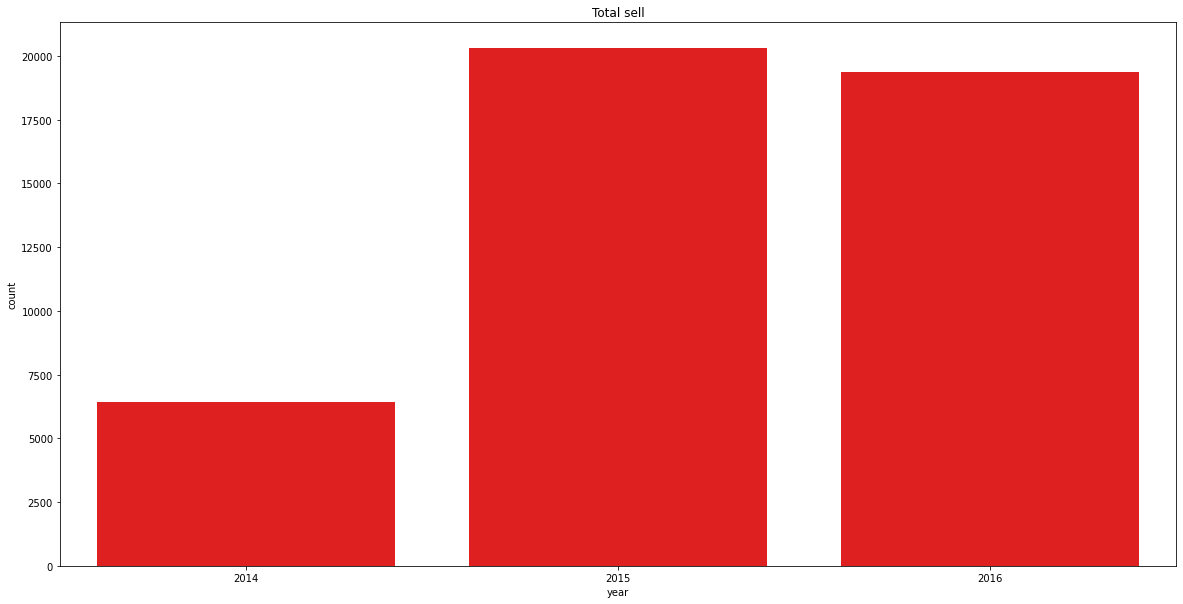

In [32]:
plt.figure(figsize=(20,10))
plt.title('Total sell')
sns.countplot(x='year', data=sales_df, color='red');

In [34]:
monthly_sell = sales_df.groupby('month')['Count'].sum()
monthly_sell

month
1     251353
2     260113
3     281343
4     270841
5     321164
6     481399
7     808157
8     703693
9     351850
10    296351
11    218058
12    214639
Name: Count, dtype: int64

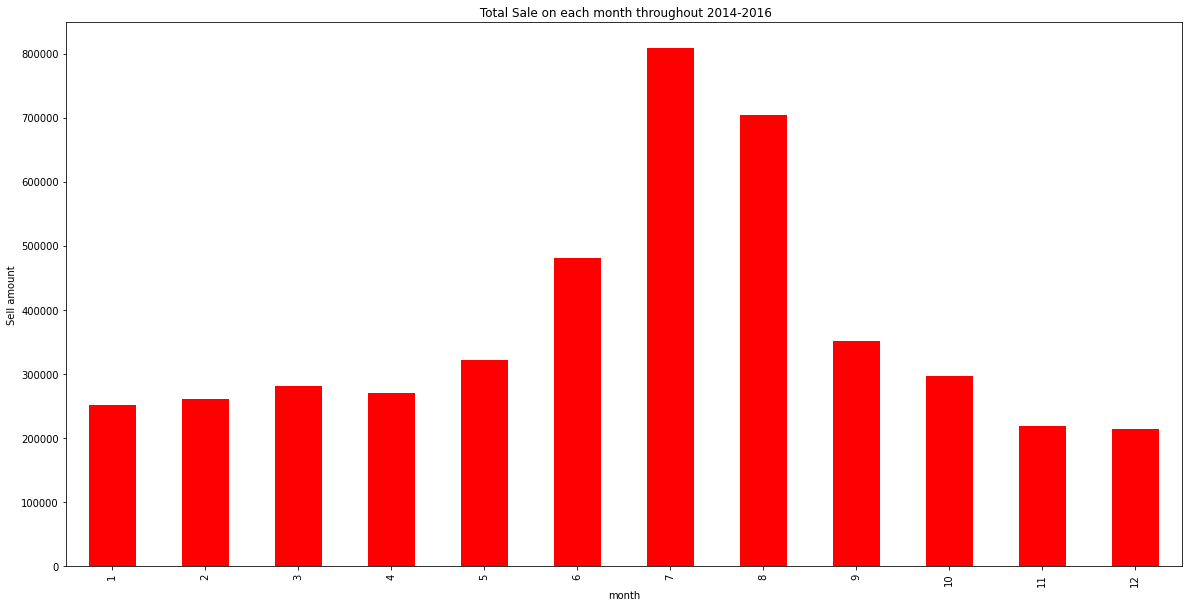

In [35]:
#Total sell on each month throughout 2014-2016
plt.figure(figsize=(20,10))
plt.title(' Total Sale on each month throughout 2014-2016')
plt.ylabel('Sell amount')
sales_df.groupby('month').Count.sum().plot(kind='bar',color='red')

### We can see that the sale is on its peak on 7th month(July).Let's find the reason by analyzing the sale on each year.

In [37]:
sales_2014 = sales_df[sales_df["Date"].dt.year == 2014]
sales_2015 = sales_df[sales_df["Date"].dt.year == 2015]
sales_2016 = sales_df[sales_df["Date"].dt.year == 2016]

In [38]:
sales_2014.head(10)

,Date,Model,Count,day,month,year
39682,2014-12-31,M54,3,31,12,2014
39683,2014-12-31,M60,76,31,12,2014
39684,2014-12-31,M1,65,31,12,2014
39685,2014-12-31,M52,49,31,12,2014
39686,2014-12-31,M118,8,31,12,2014
39687,2014-12-31,M106,3,31,12,2014
39688,2014-12-31,M27,130,31,12,2014
39689,2014-12-31,M26,40,31,12,2014
39690,2014-12-31,M119,9,31,12,2014
39691,2014-12-31,M114,1,31,12,2014


In [39]:
sales_2015.head(10)

,Date,Model,Count,day,month,year
19373,2015-12-31,M6,74,31,12,2015
19374,2015-12-31,M21,66,31,12,2015
19375,2015-12-31,M75,23,31,12,2015
19376,2015-12-31,M103,1,31,12,2015
19377,2015-12-31,M92,3,31,12,2015
19378,2015-12-31,M53,92,31,12,2015
19379,2015-12-31,M68,10,31,12,2015
19380,2015-12-31,M93,20,31,12,2015
19381,2015-12-31,M86,24,31,12,2015
19382,2015-12-31,M94,5,31,12,2015


In [40]:
sales_2016.head(10)

,Date,Model,Count,day,month,year
0,2016-08-31,M45,5,31,8,2016
1,2016-08-31,M121,3,31,8,2016
2,2016-08-31,M122,4,31,8,2016
3,2016-08-31,M91,10,31,8,2016
4,2016-08-31,M66,57,31,8,2016
5,2016-08-31,M100,59,31,8,2016
6,2016-08-31,M5,17,31,8,2016
7,2016-08-31,M14,653,31,8,2016
8,2016-08-31,M62,8,31,8,2016
9,2016-08-31,M15,25,31,8,2016


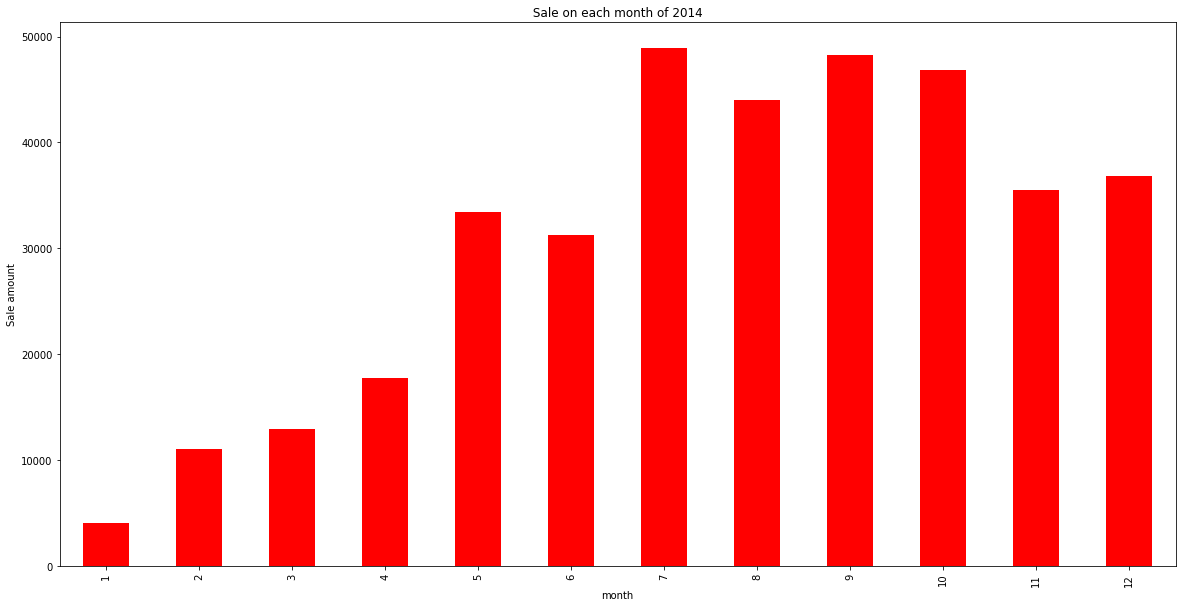

In [42]:
#Sell on each month of 2014
plt.figure(figsize=(20,10))
plt.title(' Sale on each month of 2014 ')
plt.ylabel('Sale amount')
sales_2014.groupby('month').Count.sum().plot(kind='bar', color='red')

### Here, we can that the sales of televisions are witnessing remarkable growth on July and September as these two month are followed by Eid-ul-Fitr(July 29, 2014) and Eid-ul-Azha(October 6,2014). So, sale of televisions have reached its peak ahead of Eid-ul-Fitr and Eid-ul-Azha,

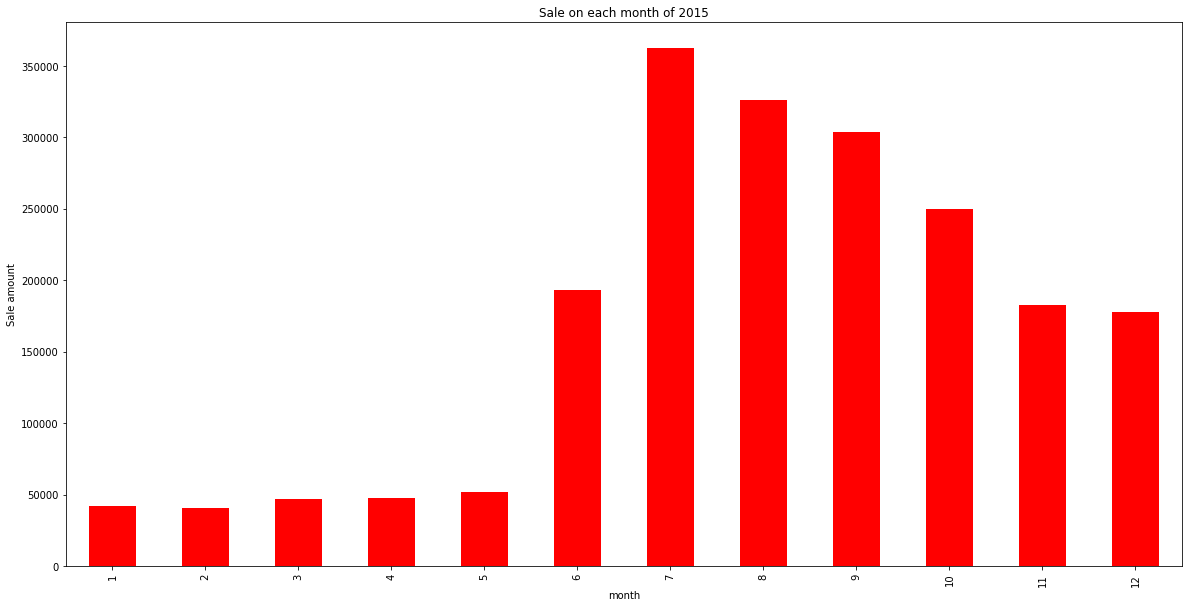

In [45]:
#Sell on each month of 2015
plt.figure(figsize=(20,10))
plt.title('Sale on each month of 2015')
plt.ylabel('Sale amount')
sales_2015.groupby('month').Count.sum().plot(kind='bar', color='red')

### Here, we can see that the sales of televisions are witnessing remarkable growth on July as this month is followed by Eid-ul-Fitr(July 17, 2015). But there is a decline on September(this month is followed by Eid-ul-Adha(September 25,2015), it may be the effect of natural hazards occured on that month.

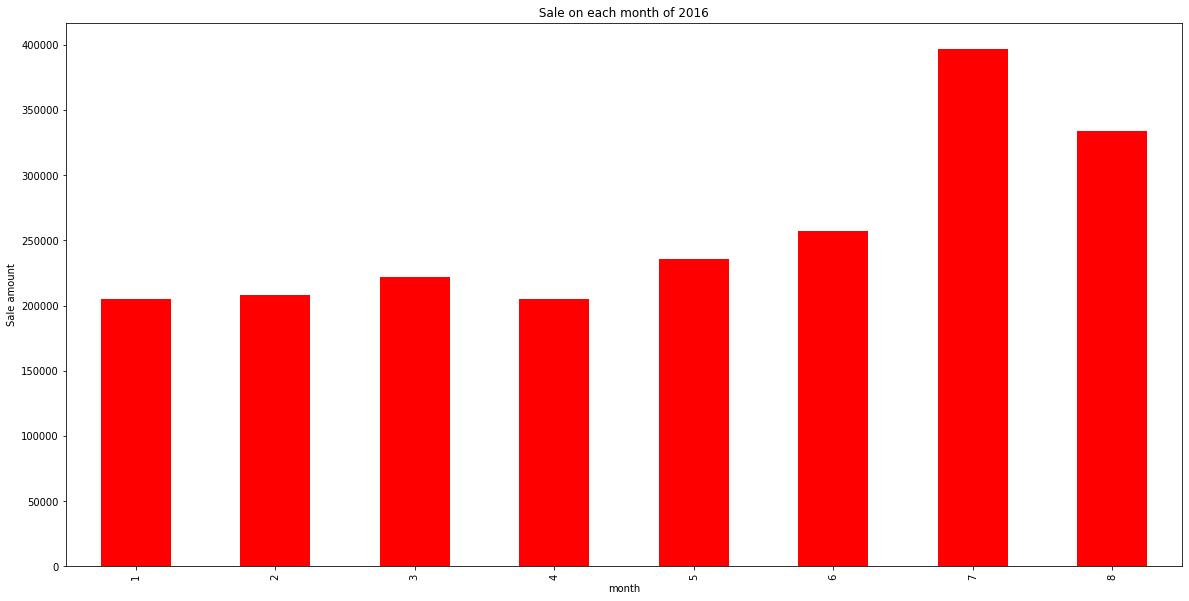

In [47]:
#Sell on each month of 2016
plt.figure(figsize=(20,10))
plt.title(' Sale on each month of 2016 ')
plt.ylabel('Sale amount')
sales_2016.groupby('month').Count.sum().plot(kind='bar', color='red')

### Here, we can see that the sales of televisions are witnessing remarkable growth on July as this month is followed by Eid-ul-Fitr(July 7, 2016).

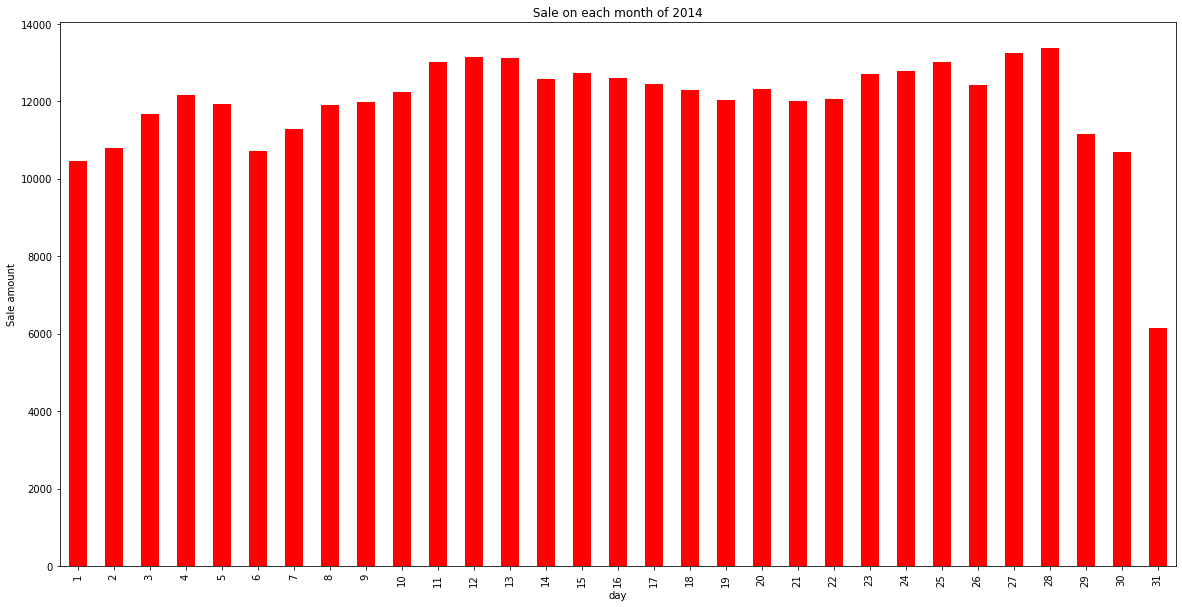

In [48]:
#Sell on each day of a month in 2014
plt.figure(figsize=(20,10))
plt.title(' Sale on each month of 2014 ')
plt.ylabel('Sale amount')
sales_2014.groupby('day').Count.sum().plot(kind='bar', color='red')

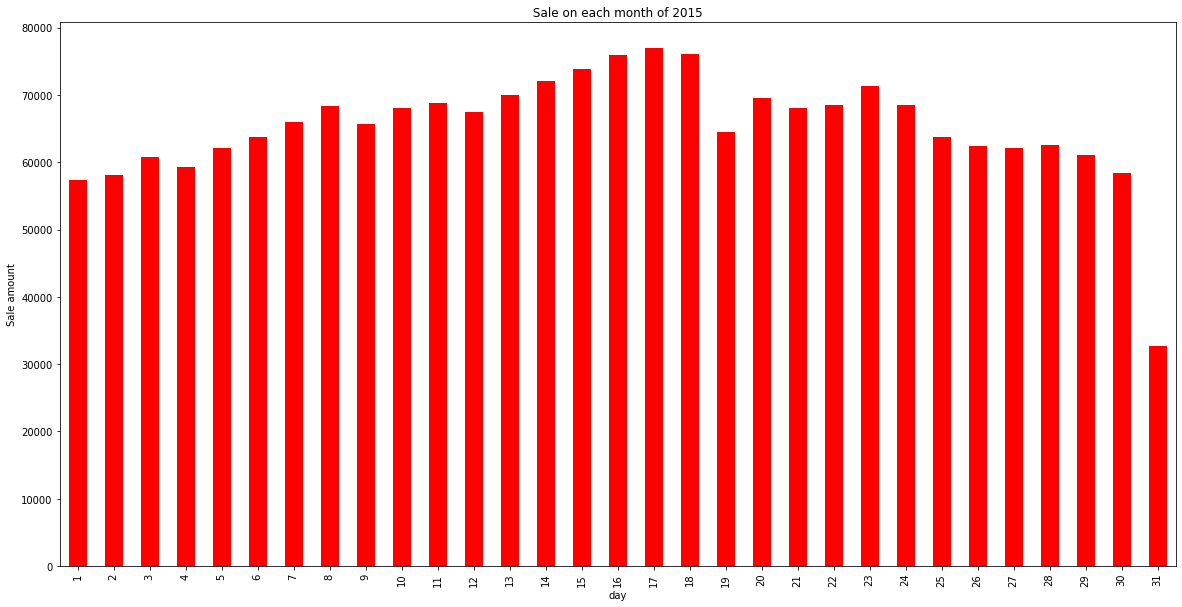

In [49]:
#Sell on each day of a month in 2015
plt.figure(figsize=(20,10))
plt.title(' Sale on each month of 2015 ')
plt.ylabel('Sale amount')
sales_2015.groupby('day').Count.sum().plot(kind='bar', color='red')

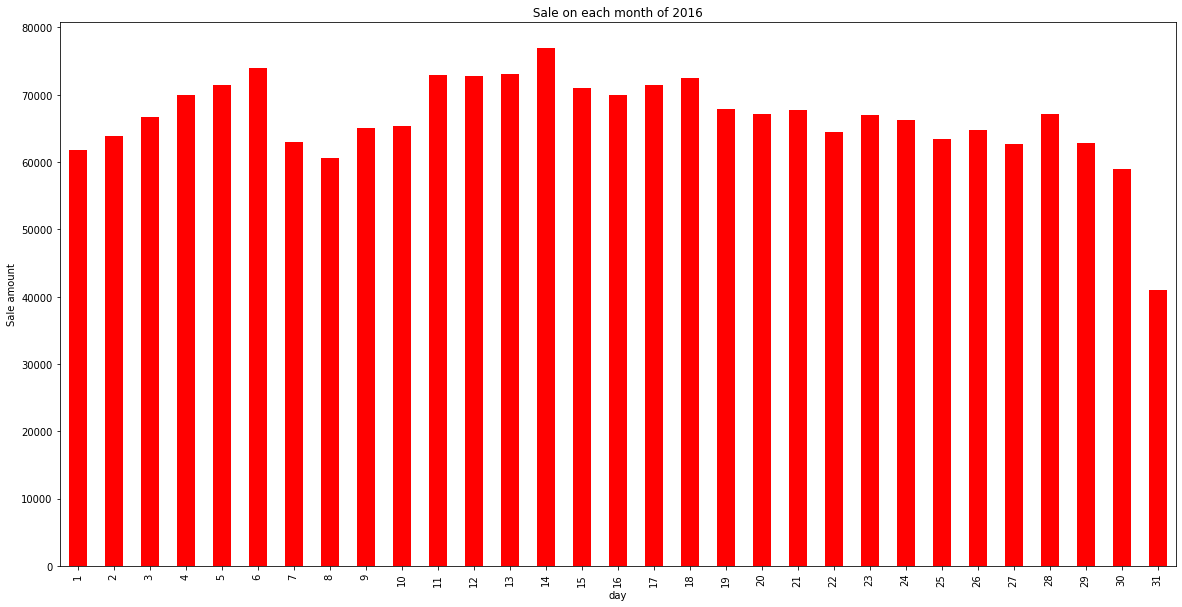

In [50]:
#Sell on each day of a month in 2016
plt.figure(figsize=(20,10))
plt.title(' Sale on each month of 2016 ')
plt.ylabel('Sale amount')
sales_2016.groupby('day').Count.sum().plot(kind='bar', color='red')

### While counting the sale on each day for a specific year->it's basically sum up all the sale on a specific day for each month(i.e sale on day 1 represents all the sale on day 1 throughout the year). Again there is decline on day 31. This is because all months do not have day 31.

In [52]:
#Assigning variable for the top 5 models
top_models = model_sale.head(5)
top_models

Model
M24    632968
M25    601395
M19    325701
M22    289524
M20    259690
Name: Count, dtype: int64

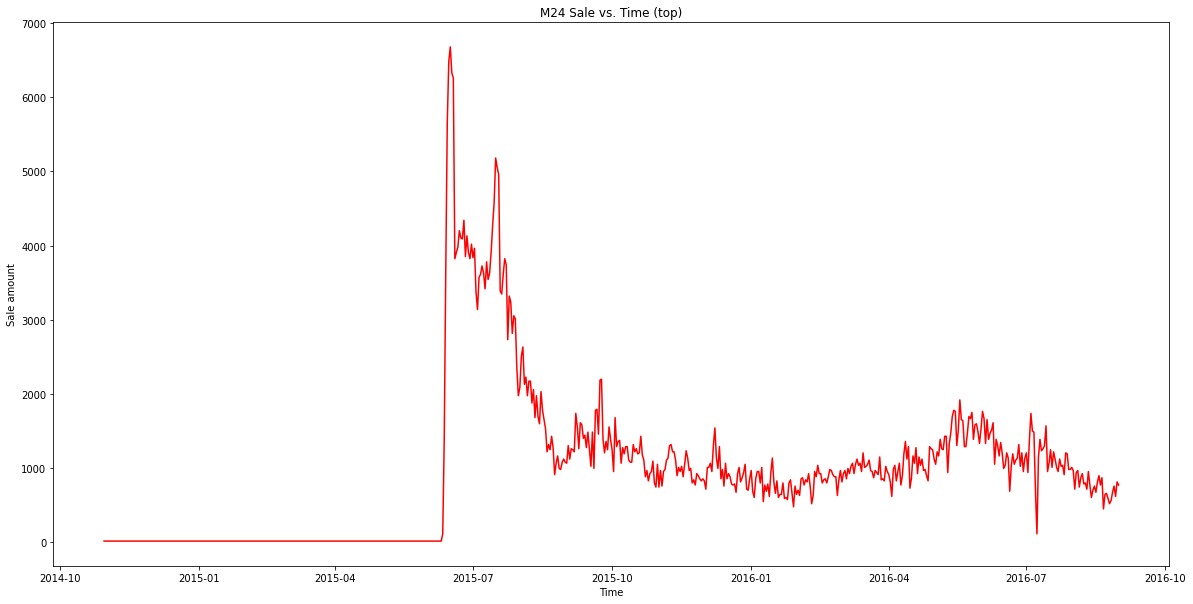

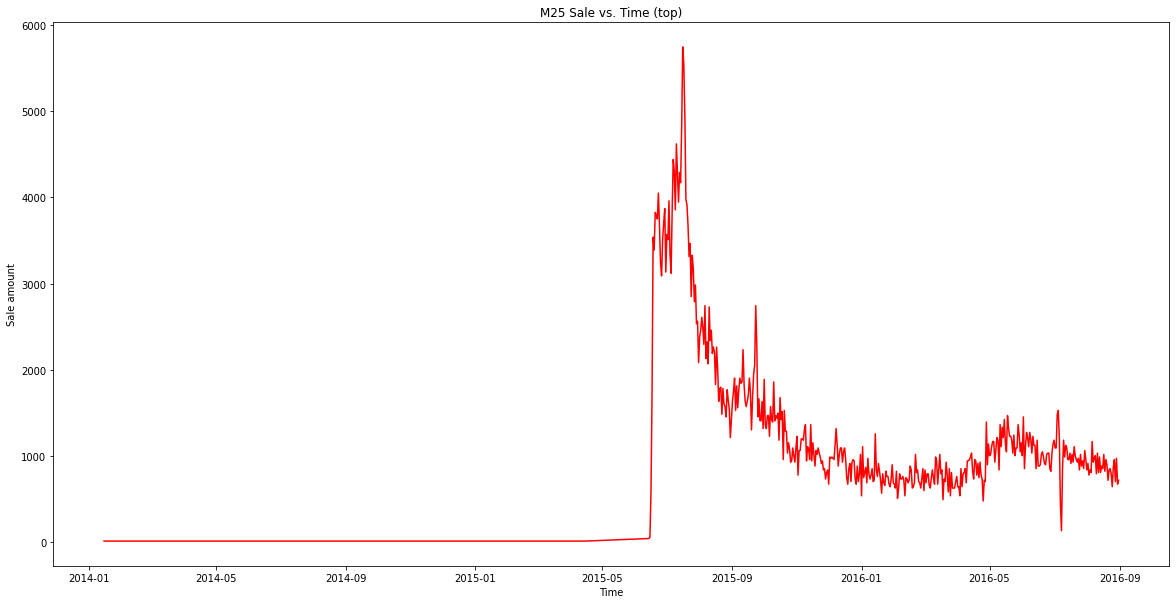

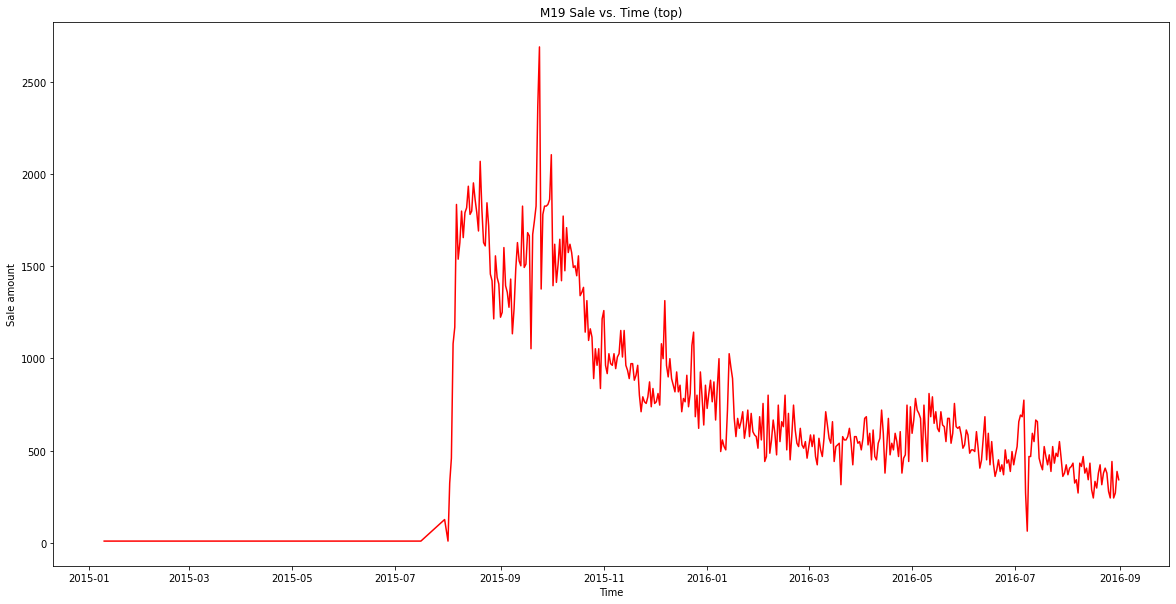

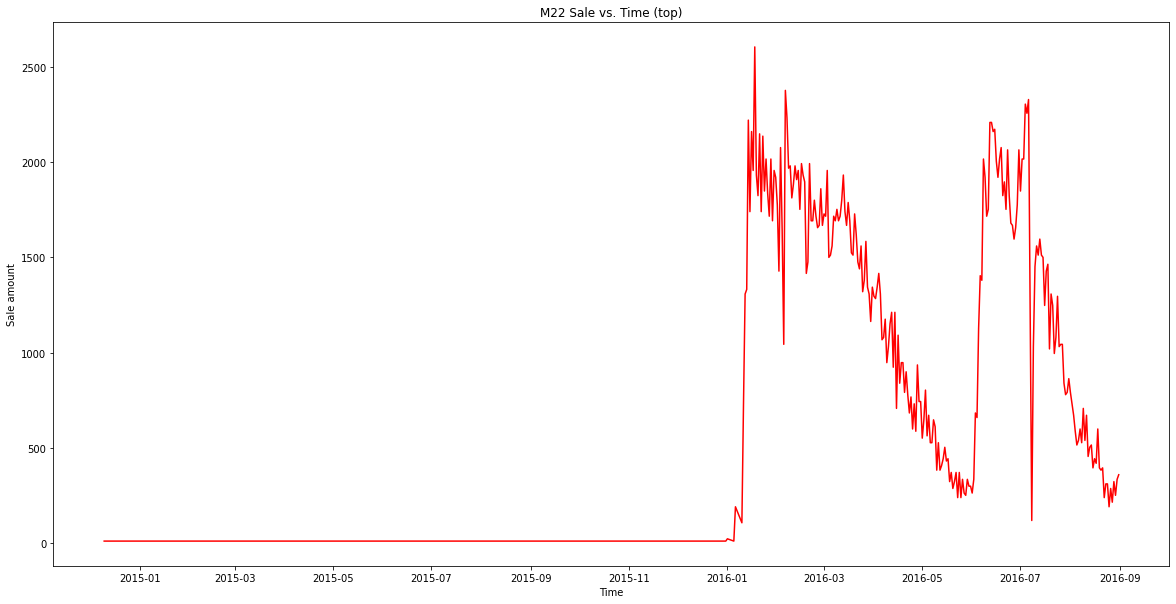

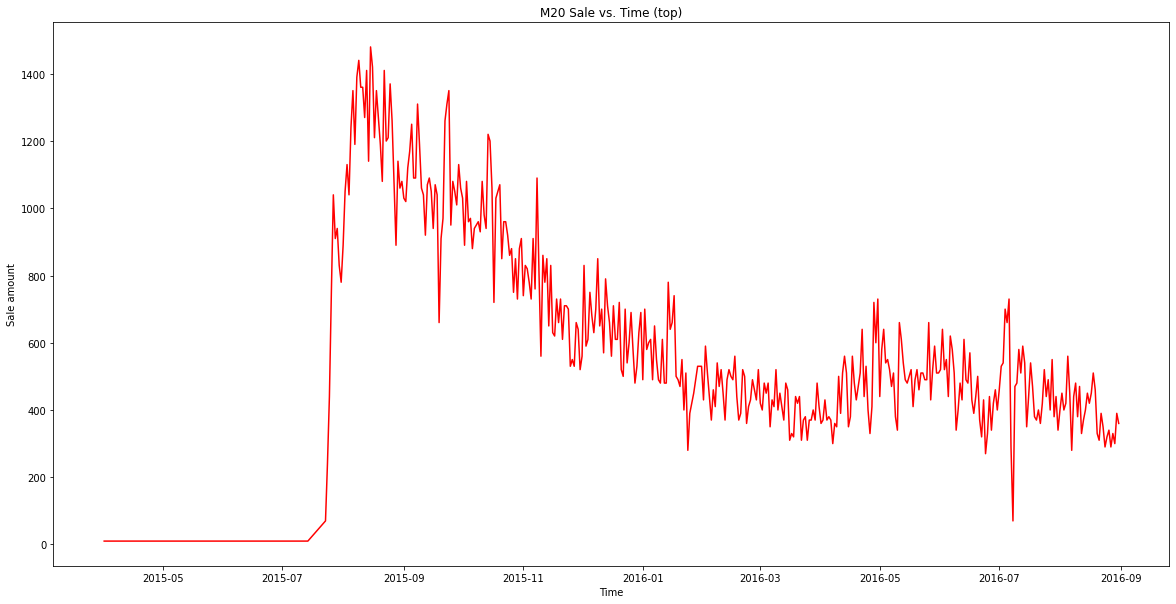

In [53]:
#Visualizing the top 5 models sale

for model in top_models.index:
    top_model = sales_df[sales_df.Model == model]
    plt.figure(figsize=(20,10))
    plt.title(model+' Sale vs. Time (top)')
    plt.ylabel('Sale amount')
    plt.xlabel('Time')
    plt.plot(pd.to_datetime(top_model['Date']),top_model['Count'],color='red') 
    plt.show()

### From the visualization of the sale of top 5 tv models we can see that a model reaches its peak after launching and the growth declines after the launching of another new model

### Now visualize which tv model sells on what amount in a specific year

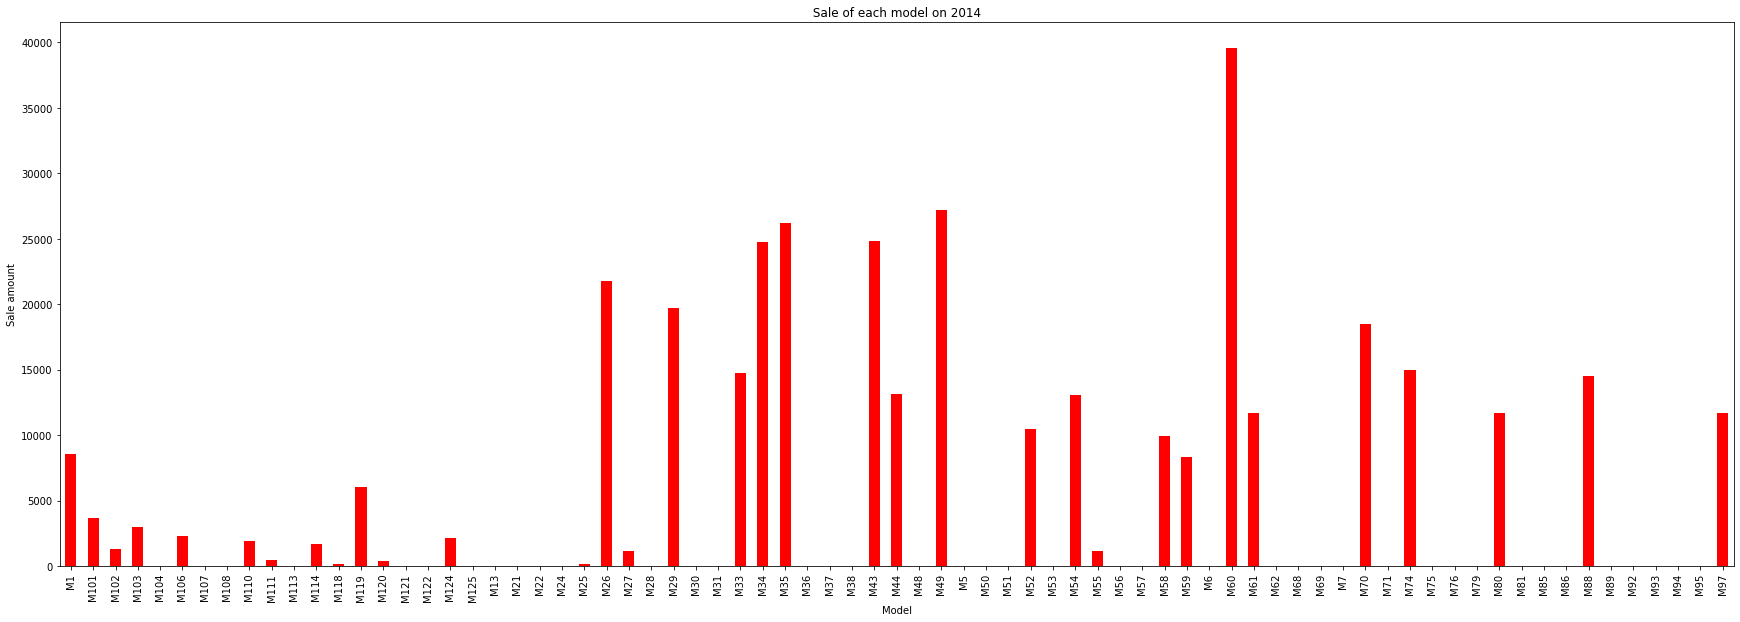

In [54]:
#Sell of each model in 2014
plt.figure(figsize=(30,10))
plt.title(' Sale of each model on 2014 ')
plt.ylabel('Sale amount')
sales_2014.groupby('Model').Count.sum().plot(kind='bar', color='red')

### The sale of TV model M60 is higher than others model in 2014

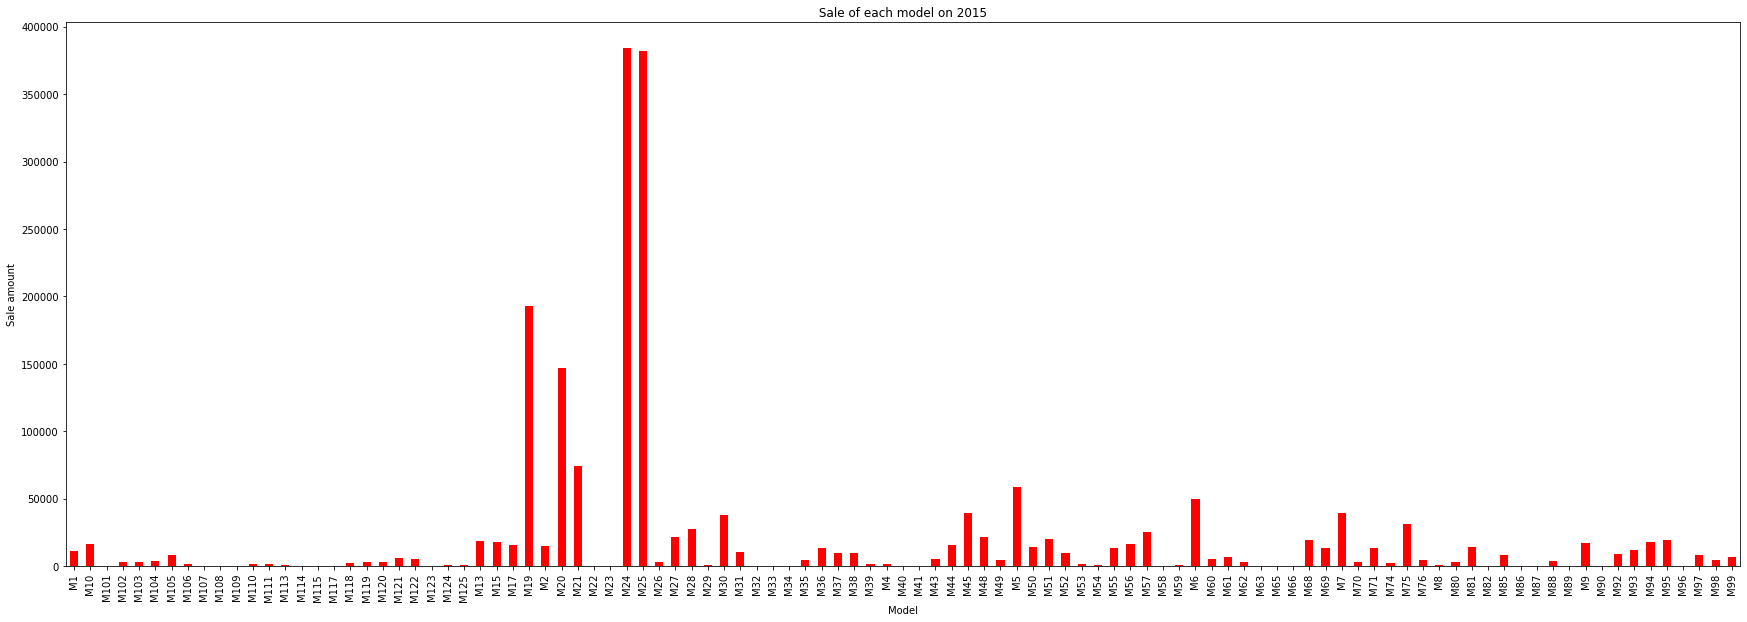

In [55]:
#sell of each models in 2015

plt.figure(figsize=(30,10))
plt.title(' Sale of each model on 2015 ')
plt.ylabel('Sale amount')
sales_2015.groupby('Model').Count.sum().plot(kind='bar', color='red')

### The sale of TV model M24 and M25 are higher than others model in 2015



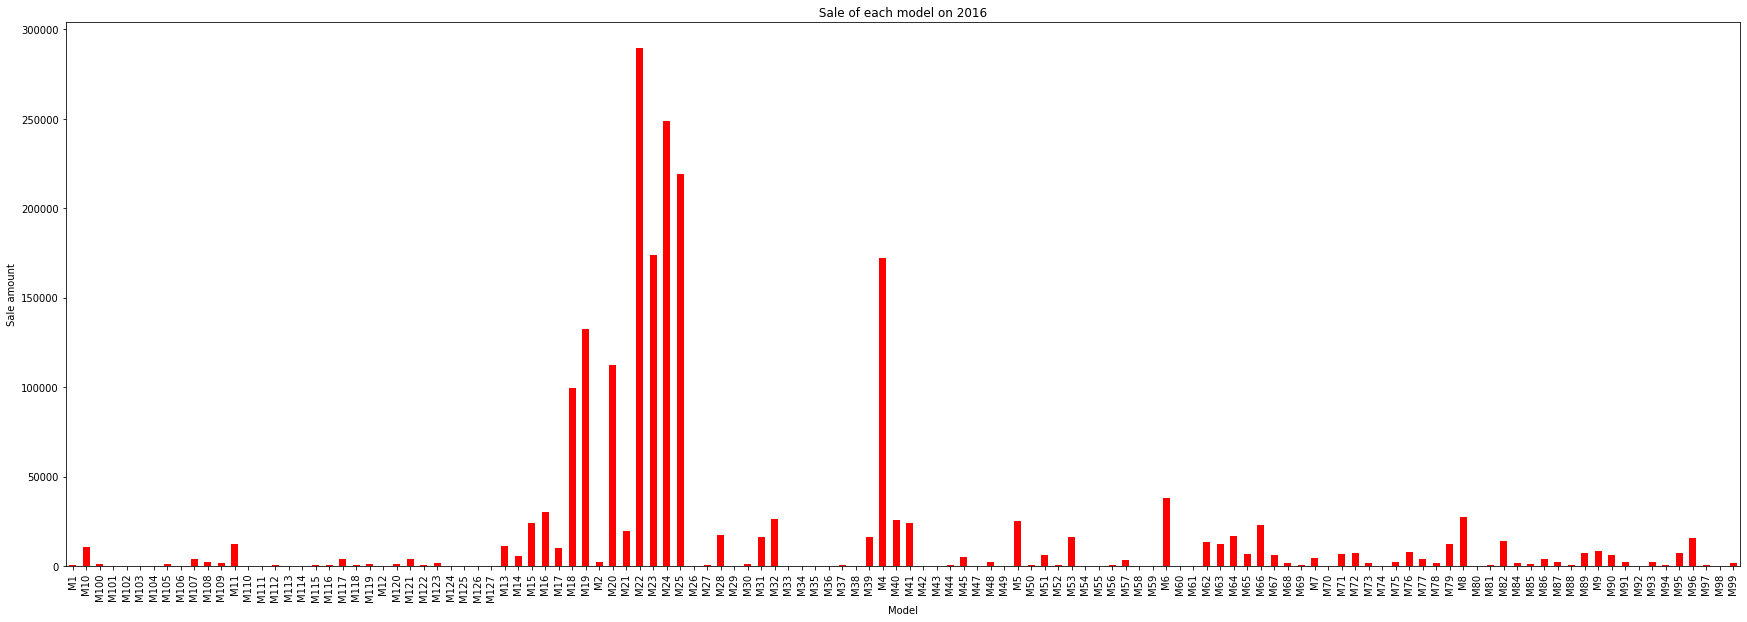

In [56]:
#sell of each models in 2016

plt.figure(figsize=(30,10))
plt.title(' Sale of each model on 2016 ')
plt.ylabel('Sale amount')
sales_2016.groupby('Model').Count.sum().plot(kind='bar', color='red')

### The sale of TV model M22 is higher than others model in 2016